In [1]:
#!pip install --force-reinstall tensorflow==1.15.0
#!pip install --upgrade --ignore-installed tensorflow-gpu==1.5

#!pip install --upgrade tensorflow-gpu

!pip install --upgrade tensorflow==2.3.0

In [2]:
#!pip install tensorflow


In [3]:
#!pip install os
!pip3 install pandas
#pip install opencv-python
!pip3 install --upgrade pip opencv-python
#apt-get update
#apt-get install -y libsm6 libxext6 libxrender-dev
#pip install opencv-python
!pip3 install opencv-python-headless

import tensorflow as tf
import numpy as np
import pandas as pd
import cv2

In [4]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [5]:
import tensorflow.compat.v1 as tf
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # basta mudar este numero
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
tf.compat.v1.disable_eager_execution()

In [8]:

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Instructions for updating:
non-resource variables are not supported in the long term
Num GPUs Available:  1


In [9]:
from tensorflow.python.client import device_lib

In [10]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9407135330074258545
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 871847515574390397
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14135263859232153889
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 23445127808
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17068704731741801499
physical_device_desc: "device: 0, name: Quadro P6000, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [11]:
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

#init = tf.global_variables_initializer()
#sess.run(init)

In [12]:
#config = tf.compat.v1.ConfigProto()

#config.gpu_options.allow_growth=True

#sess = tf.compat.v1.Session(config=config)

In [13]:
#gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.3333)]
##NUM_THREADS=4

##config = tf.compat.v1.ConfigProto(device_count = {'GPU': 90 , 'CPU': 60} )#device_count = {'GPU': 20 , 'CPU': 56} ) #intra_op_parallelism_threads=NUM_THREADS)# 
##sess = tf.compat.v1.Session(config=config)#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 
##tf.compat.v1.keras.backend.set_session(sess)


In [14]:
#!pip install --upgrade google

In [15]:
#from google.colab import drive

#drive.flush_and_unmount()
#drive.mount('/content/drive/', force_remount=True)

In [16]:
tipo_dos_dados = str("GRAYSCALE")

In [17]:
import numpy as np

X = []
y = []

#for features,label in training_data:
#    X.append(features)
#    y.append(label)

X = np.load("./X_{}.npy".format(tipo_dos_dados))
y = np.load("./y_{}.npy".format(tipo_dos_dados))

print(X.shape, y.shape)

(52262, 75, 75, 3) (52262,)


In [18]:
import pickle
pickle_out = open("./X_{}.pickle".format(tipo_dos_dados),"wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("./y_{}.pickle".format(tipo_dos_dados),"wb")
pickle.dump(y, pickle_out)
pickle_out.close()

5
(52262, 75, 75, 3)


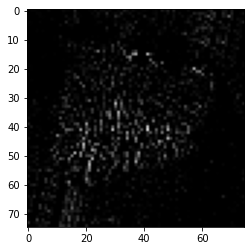

In [19]:
import os
import matplotlib.pyplot as plt
import cv2

#Array de cada imagem
print(y[0])

#Dimensão da imagem
print(X.shape)

#Novo formato das imagens
IMG_SIZE=75
new_array = cv2.resize(X[0], (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [20]:
!pip install keras==2.0

In [21]:
!pip install sklearn

In [22]:
!rm -rf ./logs

In [23]:

import tensorflow as tf
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import numpy as np
#from keras.backend.tensorflow_backend import set_session
import keras
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import random
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

pickle_in = open("./X_{}.pickle".format(tipo_dos_dados),"rb")
X = pickle.load(pickle_in)
                    
pickle_in = open("./y_{}.pickle".format(tipo_dos_dados),"rb")
y = pickle.load(pickle_in)


Using TensorFlow backend.


In [24]:
X, y=np.array(X),np.array(y)

In [25]:
X=X/255.0

In [26]:
count=0
classe=0
count_class=[]

for i in range(6):
  count=0
  for k in range(0,len(y)):
    if (y[k]==classe):
      count=count+1
  print("Classe: {}  Quantidade: {}".format(classe, count))
  classe=classe+1
  count_class.append(count)

print(sum(count_class))

Classe: 0  Quantidade: 9453
Classe: 1  Quantidade: 9647
Classe: 2  Quantidade: 9445
Classe: 3  Quantidade: 9444
Classe: 4  Quantidade: 9447
Classe: 5  Quantidade: 4826
52262


In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, shuffle=True) # test_size é o percentual do dataset que vai ser usado nas amostras
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, shuffle=True) # test_size é o percentual do dataset que vai ser usado nas amostras

print(X.shape)

(52262, 75, 75, 3)


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import time
import keras
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.framework import ops

NAME = "Movimento certo x Movimento errado-{}".format(int (time.time()))

def build_model(neuron_number, dropout_rate):
  model = tensorflow.keras.Sequential([
  #tensorflow.keras.layers.Conv2D(64, (4, 4), activation='relu', input_shape=X.shape[1:]),
  tensorflow.keras.layers.Conv2D(64, (4, 4), activation='relu', input_shape=X.shape[1:]),#(IMG_SIZE, IMG_SIZE, 3)),
  tensorflow.keras.layers.MaxPooling2D(),
  tensorflow.keras.layers.Dropout(0.2),
  tensorflow.keras.layers.Conv2D(144, (4, 4), activation='relu'),
  tensorflow.keras.layers.MaxPooling2D(),
  tensorflow.keras.layers.Dropout(0.2),
  #tensorflow.keras.layers.Conv2D(256, (4, 4), activation='relu'),
  #tensorflow.keras.layers.MaxPooling2D(),
  #tensorflow.keras.layers.Dropout(0.2),
  #tensorflow.keras.layers.Conv2D(8, (4, 4), activation='relu'),
  #tensorflow.keras.layers.MaxPooling2D(),
  #tensorflow.keras.layers.Dropout(0.25),
  tensorflow.keras.layers.Flatten(),
  tensorflow.keras.layers.Dense((1000), activation='relu'),
  tensorflow.keras.layers.Dropout(0.0),
  tensorflow.keras.layers.Dense((100), activation='relu'),
  tensorflow.keras.layers.Dropout(0.0),
  tensorflow.keras.layers.Dense(neuron_number, activation='relu'),
  tensorflow.keras.layers.Dropout(dropout_rate),
  tensorflow.keras.layers.Dense(6, activation='softmax')
  ])

  model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,# tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam',
              metrics=['accuracy'])

  model.summary()
  return model


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 72, 72, 64)        3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 144)       147600    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 144)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 144)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0

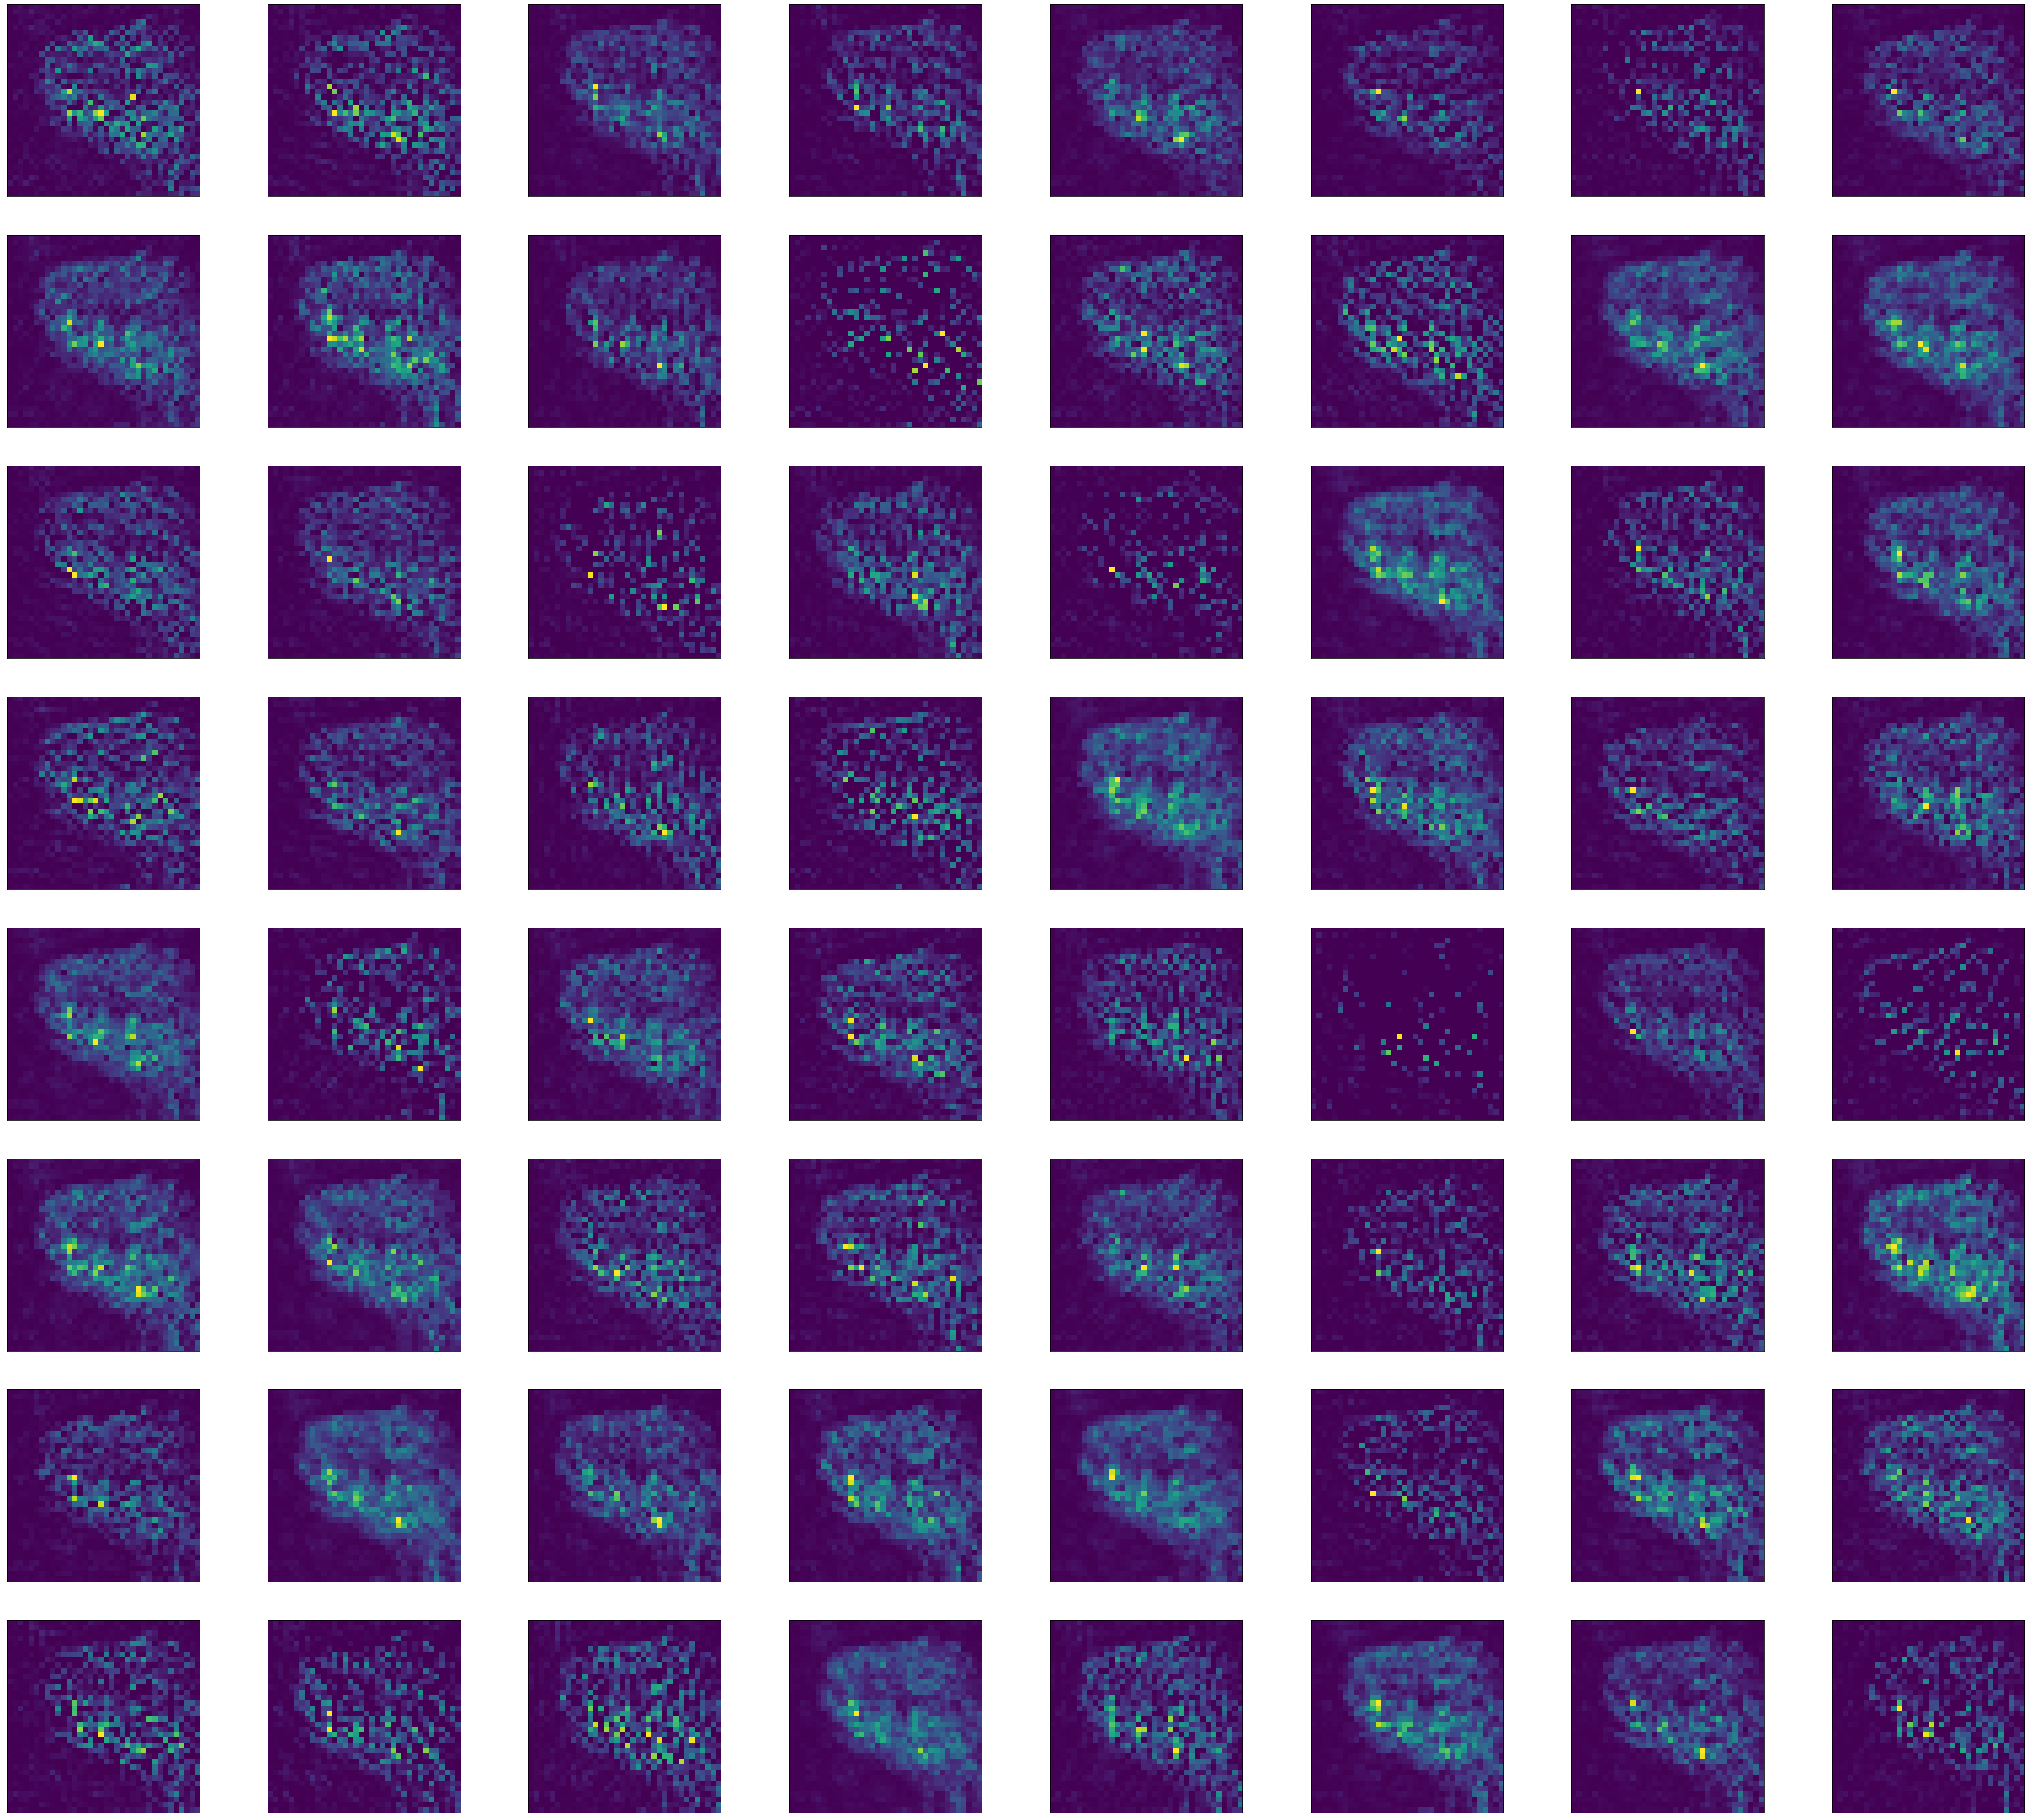

In [29]:
from numpy import expand_dims
import tensorflow
from tensorflow.keras.applications.vgg16 import preprocess_input
from matplotlib import pyplot
from tensorflow.keras.models import Model

ops.reset_default_graph()

model_created=build_model(neuron_number=100,dropout_rate=0.2)

img=X_test[1]
print(Y_test[1])
model = Model(inputs=model_created.inputs, outputs=model_created.layers[2].output)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
pyplot.figure(figsize=(55, 50))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1])
		ix += 1
# show the figure
pyplot.show()

In [30]:
#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=0.01, patience=3)

In [31]:
model=build_model(neuron_number=100,dropout_rate=0.1)


tempo_inicial=time.time()

hist= model.fit(X_train, Y_train, epochs=20, batch_size=16, shuffle=True, validation_data=(X_val, Y_val),callbacks=[es])

print(time.time()-tempo_inicial)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 72, 72, 64)        3136      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 144)       147600    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 144)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 144)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)            

In [32]:
model.evaluate(X_val,Y_val)

[0.07890571971123403, 0.9755094]

In [33]:
model.evaluate(X_test,Y_test)

[0.07969499728916375, 0.9738831]

In [34]:
import matplotlib.pyplot as plt

def plota_historico(history, model):
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model loss - Model {}'.format(model))
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.savefig("Model loss.png")
  plt.show()

  plt.plot(hist.history['acc'])
  plt.plot(hist.history['val_acc'])
  plt.title('Model accuracy - Model {}'.format(model))
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.savefig("Accuracy.png")
  plt.show()


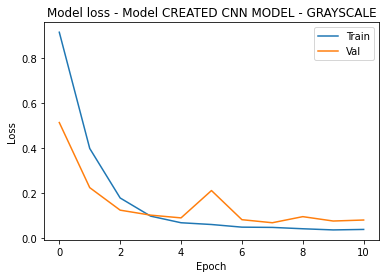

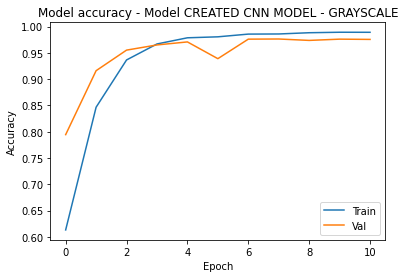

In [35]:
plota_historico(hist,model="CREATED CNN MODEL - {}".format(tipo_dos_dados))

In [36]:
model_json = model.to_json()
with open("model_{}.json".format(tipo_dos_dados), "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_{}.h5".format(tipo_dos_dados))
print("Saved model to disk")

Saved model to disk


In [37]:
model.save('../STAR RGB/Modelo_detecta_caminhada_6_movimentos_CNN_{}'.format(tipo_dos_dados)) #("/tf/tensorflow-tutorials/Modelo_1/Modelo_detecta_caminhada", save_format='tf')

In [38]:
load_model = tf.keras.models.load_model("../STAR RGB/Modelo_detecta_caminhada_6_movimentos_CNN_{}".format(tipo_dos_dados)) #('/tf/tensorflow-tutorials/Wyctor/Modelo_detecta_caminhada')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [39]:
!pip install --upgrade pydot graphviz

import graphviz
graphviz.version

<function graphviz.backend.version()>

In [40]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,StratifiedKFold
#from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import numpy as np

def y_prediction(X_test):
  y_pred = model.predict(X_test)  #cross_val_predict(model, X_train, Y_train, cv = cv)
  #print(y_pred)
  y_pred=(np.around(y_pred))
  #print(y_pred)

  y_Pred=[]
  for i in range(0,len(y_pred)):
      #print(np.argmax(y_pred[i]))
      y_Pred.append(np.argmax(y_pred[i]))

  return y_Pred


In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,StratifiedKFold
#from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred= y_prediction(X_test)
confusion_matrix(Y_test,y_pred)

array([[1758,    0,   15,   96,    2,    2],
       [   0, 1952,    0,    0,    0,    0],
       [   7,    0, 1883,    9,    1,    1],
       [  26,    0,    3, 1870,    3,    2],
       [  16,    0,    1,   20, 1790,   15],
       [  13,    0,    2,   24,   17,  925]])

In [42]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize=(24,24)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Normalized confusion matrix


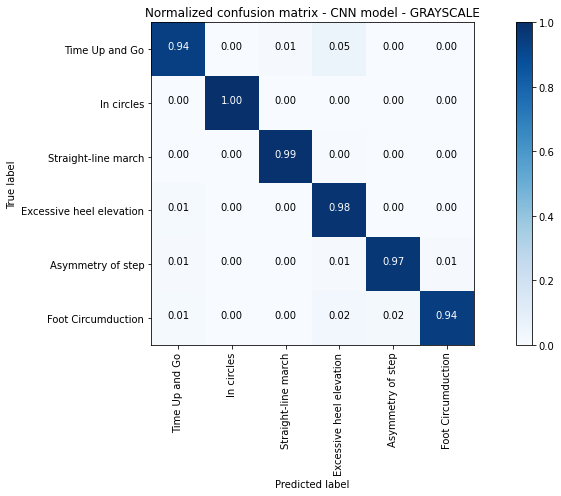

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=3)

# Plot normalized confusion matrix

#CATEGORIAS=["Time Up and Go","Em circulos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]
CATEGORIAS=["Time Up and Go","In circles", "Straight-line march", "Excessive heel elevation","Asymmetry of step", "Foot Circumduction"]

plt.figure(figsize=(12, 7))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix - CNN model - {}'.format(tipo_dos_dados))
plt.savefig("Normalized Confusion Matrix - CNN MODEL - {}.png".format(tipo_dos_dados))
plt.show()

Confusion matrix, without normalization


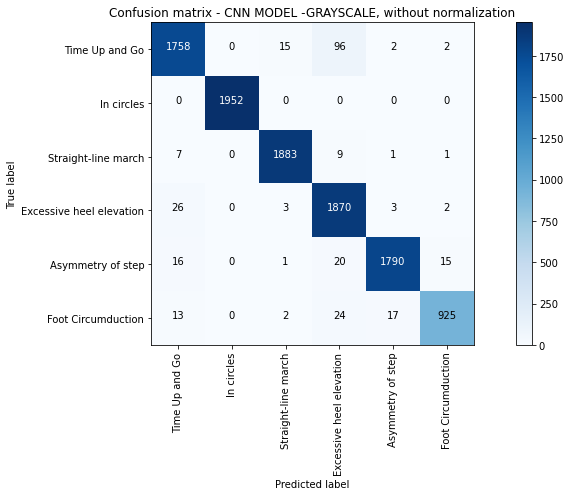

In [44]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 7))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS,title='Confusion matrix - CNN MODEL -{}, without normalization'.format(tipo_dos_dados),normalize=False)
plt.savefig("Confusion matrix - CNN MODEL - {}.png".format(tipo_dos_dados))

plt.show()

In [45]:
import pandas as pd
from sklearn.metrics import classification_report


clsf_report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = y_pred,target_names=CATEGORIAS, output_dict=True)).transpose()
clsf_report.to_csv('./classification_report_my_model_{}.csv'.format(tipo_dos_dados), index= True)

In [46]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def ROC_E_AUC(y_Pred,Y_val,modelo):
    lw=2
    n_classes=6
    # Binarize the output
    Y_val= label_binarize(Y_val, classes=[0, 1, 2,3,4,5])
    n_classes = Y_val.shape[1]

    y_Pred= label_binarize(y_Pred, classes=[0, 1, 2,3,4,5])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], y_Pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), y_Pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(12, 7))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.4f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.savefig("Curva_ROC_6_movimentos_{}_1-1_CICLO_NA_NORMALIZAÇÃO_{}_MODEL_{}.png".format(tipo_dos_dados,modelo,tipo_dos_dados))
    plt.show()
    print(roc_auc)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


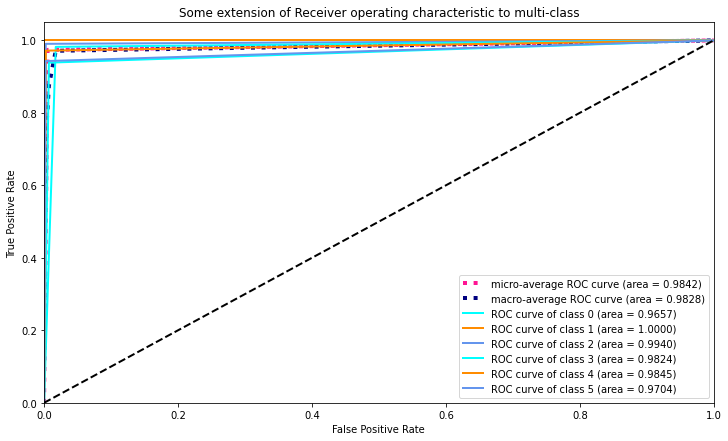

{0: 0.965687533680059, 1: 1.0, 2: 0.9940378666833319, 3: 0.9823569590428287, 4: 0.984549406605772, 5: 0.9704019529850951, 'micro': 0.984215057878121, 'macro': 0.982838953166181}


In [47]:
ROC_E_AUC(y_pred,Y_test, modelo="CREATED CNN MODEL - GRAYSCALE")

In [48]:
from sklearn.metrics import classification_report

classification_report(y_true = Y_test, y_pred = y_pred, output_dict=False, digits=3)

'              precision    recall  f1-score   support\n\n           0      0.966     0.939     0.952      1873\n           1      1.000     1.000     1.000      1952\n           2      0.989     0.991     0.990      1901\n           3      0.926     0.982     0.953      1904\n           4      0.987     0.972     0.979      1842\n           5      0.979     0.943     0.961       981\n\n    accuracy                          0.974     10453\n   macro avg      0.975     0.971     0.973     10453\nweighted avg      0.974     0.974     0.974     10453\n'

## Testa da VGG com o Star RGB

> VGG 16





In [111]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50, InceptionV3, DenseNet121
from tensorflow.keras import Input, Model

IMG_SIZE = 75

base_model = VGG16(include_top=False, weights="imagenet", input_shape=(X_train.shape[1:]))
base_model.training=True
base_model.trainable=False
base_model.summary()



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [112]:
X_train.shape

(31356, 75, 75, 3)

In [113]:
inputs = tf.keras.Input(shape=(X_train.shape[1:]))
prediction_layer = tf.keras.layers.Dense(6, activation='softmax')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

x = base_model(inputs)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
# = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.9)(x)
x = tf.keras.layers.Dropout(0.0)(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
# = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.9)(x)
x = tf.keras.layers.Dropout(0.0)(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.9)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [114]:
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_8 ( (None, 512)               0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 1000)              513000    
_________________________________________________________________
dropout_42 (Dropout)         (None, 1000)            

In [115]:
len(model.trainable_variables)

10

In [116]:

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='Adam',metrics=['accuracy'])

tempo_inicial=time.time()

hist= model.fit(X_train, Y_train, epochs=100, batch_size=16, shuffle=True, validation_data=(X_val, Y_val),callbacks=[es])

print(time.time()-tempo_inicial)

Train on 31356 samples, validate on 10453 samples
Epoch 1/100
31356/31356 [==============================] - 39s 1ms/sample - loss: 1.4056 - acc: 0.4180 - val_loss: 1.1668 - val_acc: 0.5058
Epoch 2/100
31356/31356 [==============================] - 36s 1ms/sample - loss: 1.2428 - acc: 0.4742 - val_loss: 1.1075 - val_acc: 0.5324
Epoch 3/100
31356/31356 [==============================] - 36s 1ms/sample - loss: 1.2228 - acc: 0.4880 - val_loss: 1.1102 - val_acc: 0.5388
Epoch 4/100
31356/31356 [==============================] - 36s 1ms/sample - loss: 1.2012 - acc: 0.4975 - val_loss: 1.1054 - val_acc: 0.5259
Epoch 5/100
31356/31356 [==============================] - 39s 1ms/sample - loss: 1.1839 - acc: 0.5064 - val_loss: 1.0771 - val_acc: 0.5576
Epoch 6/100
31356/31356 [==============================] - 37s 1ms/sample - loss: 1.1723 - acc: 0.5081 - val_loss: 1.0587 - val_acc: 0.5556
Epoch 7/100
31356/31356 [==============================] - 38s 1ms/sample - loss: 1.1594 - acc: 0.5181 - val_l

In [117]:
##model.save("/content/drive/MyDrive/Colab Notebooks/CLASSIFICADOR TIPOS DE MARCHAS/CONVOLUCIONAL - IMAGENS/Modelo_VGG16_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_STAR_RGB", save_format='tf')
model.save("./Modelo_VGG16_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_{}".format(tipo_dos_dados))
load_model = tf.keras.models.load_model("./Modelo_VGG16_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_{}".format(tipo_dos_dados))

In [118]:
#load_model = tf.keras.models.load_model("./Modelo_VGG16_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_{}".format(tipo_dos_dados))

In [119]:
CATEGORIAS=["Time Up and Go","In circles", "Straight-line march", "Excessive heel elevation","Asymmetry of step", "Foot Circumduction"]


Normalized confusion matrix


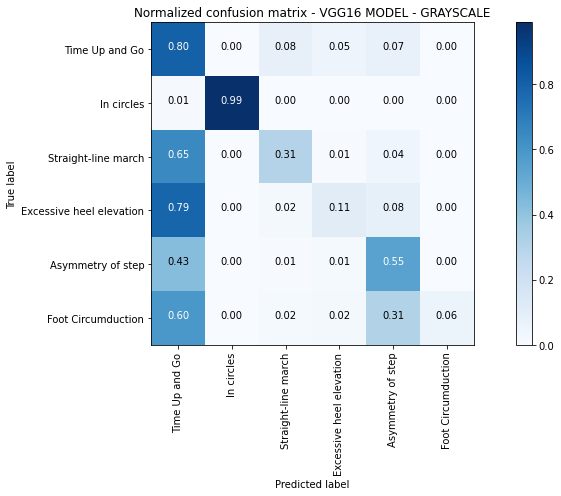

In [120]:
# Compute confusion matrix

y_Pred=y_prediction(X_test)

cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=3)

# Plot normalized confusion matrix

#CATEGORIAS=["Time Up and Go","Em circulos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

plt.figure(figsize=(12, 7))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix - VGG16 MODEL - {}'.format(tipo_dos_dados))
plt.savefig("Normalized Confusion Matrix - VGG16 MODEL - {}.png".format(tipo_dos_dados))
plt.show()

In [121]:
import pandas as pd
from sklearn.metrics import classification_report


clsf_report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = y_Pred, output_dict=True)).transpose()
clsf_report.to_csv('./classification_report_VGG16_{}.csv'.format(tipo_dos_dados), index= True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


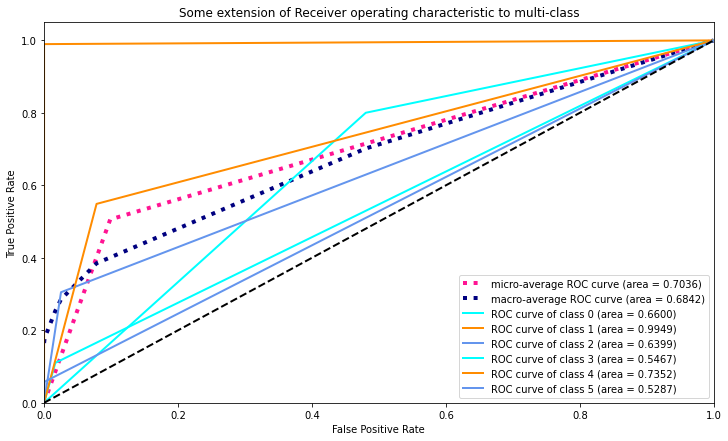

{0: 0.6599503806391153, 1: 0.9948770491803278, 2: 0.6399226639123026, 3: 0.5467250211583055, 4: 0.7352359133098828, 5: 0.528682477632449, 'micro': 0.7035874868458816, 'macro': 0.6842322509720637}


In [122]:
ROC_E_AUC(y_Pred,Y_test,modelo='VGG16 - {}'.format(tipo_dos_dados))

# Testa da VGG com o Star RGB
VGG 19

In [92]:
base_model = VGG19(include_top=False, weights="imagenet", input_shape=(X_train.shape[1:]))
base_model.training=True
base_model.trainable=False
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [93]:
inputs = tf.keras.Input(shape=(X_train.shape[1:]))
prediction_layer = tf.keras.layers.Dense(6, activation='softmax')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

x = base_model(inputs)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1000, activation='relu')(x)
#x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.9)(x)
x = tf.keras.layers.Dropout(0.0)(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.9)(x)
x = tf.keras.layers.Dropout(0.0)(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.9)(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1000)              513000    
_________________________________________________________________
dropout_30 (Dropout)         (None, 1000)            

In [94]:
es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=0.001, patience=4)


In [95]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

tempo_inicial=time.time()

hist= model.fit(X_train, Y_train, epochs=100, batch_size=16, shuffle=True, validation_data=(X_val, Y_val),callbacks=[es])

print(time.time()-tempo_inicial)

Train on 31356 samples, validate on 10453 samples
Epoch 1/100
31356/31356 [==============================] - 50s 2ms/sample - loss: 1.5214 - acc: 0.3989 - val_loss: 1.2227 - val_acc: 0.4800
Epoch 2/100
31356/31356 [==============================] - 51s 2ms/sample - loss: 1.2828 - acc: 0.4615 - val_loss: 1.2514 - val_acc: 0.4544
Epoch 3/100
31356/31356 [==============================] - 51s 2ms/sample - loss: 1.2418 - acc: 0.4768 - val_loss: 1.0946 - val_acc: 0.5529
Epoch 4/100
31356/31356 [==============================] - 51s 2ms/sample - loss: 1.2263 - acc: 0.4805 - val_loss: 1.0990 - val_acc: 0.5425
Epoch 5/100
31356/31356 [==============================] - 50s 2ms/sample - loss: 1.2089 - acc: 0.4898 - val_loss: 1.0790 - val_acc: 0.5504
Epoch 6/100
31356/31356 [==============================] - 49s 2ms/sample - loss: 1.1954 - acc: 0.5022 - val_loss: 1.0674 - val_acc: 0.5597
Epoch 7/100
31356/31356 [==============================] - 49s 2ms/sample - loss: 1.1907 - acc: 0.5018 - val_l

In [96]:
model.save("./Modelo_VGG19_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_{}".format(tipo_dos_dados))
load_model = tf.keras.models.load_model("./Modelo_VGG19_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_{}".format(tipo_dos_dados))

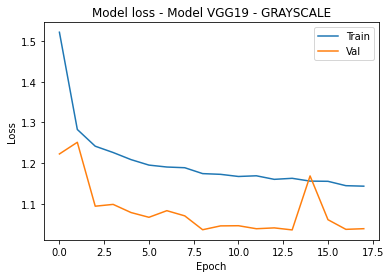

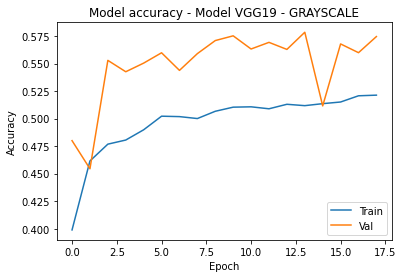

In [97]:
plota_historico(hist,model="VGG19 - {}".format(tipo_dos_dados))

Normalized confusion matrix


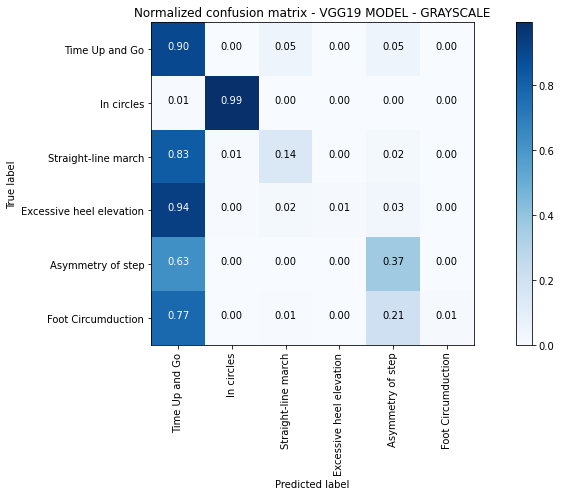

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


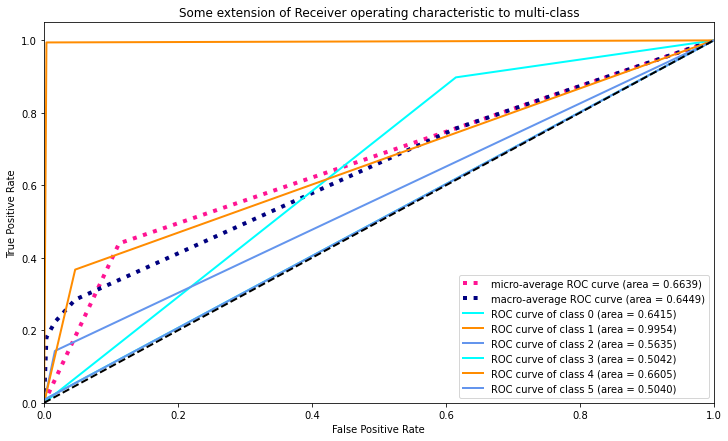

{0: 0.6414947972476002, 1: 0.9954178787548621, 2: 0.563473005936022, 3: 0.504200513402226, 4: 0.6605415377220587, 5: 0.504024684805218, 'micro': 0.6639242322778149, 'macro': 0.6448587363113312}


In [98]:
from sklearn.metrics import classification_report


y_Pred=y_prediction(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix

#CATEGORIAS=["Time Up and Go","Em circulos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

plt.figure(figsize=(12, 7))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix - VGG19 MODEL - {}'.format(tipo_dos_dados))
plt.savefig("Normalized Confusion Matrix - VGG19 MODEL - {}.png".format(tipo_dos_dados))
plt.show()

clsf_report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = y_Pred, output_dict=True)).transpose()
clsf_report.to_csv('./classification_report_VGG19_{}.csv'.format(tipo_dos_dados), index= True)

ROC_E_AUC(y_Pred,Y_test,modelo='VGG19 - {}'.format(tipo_dos_dados))

# RESNET50


In [99]:
from tensorflow.keras import regularizers


base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(IMG_SIZE, IMG_SIZE,3))
base_model.training=True
base_model.trainable=False

base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 81, 81, 3)    0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 38, 38, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 38, 38, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [100]:
inputs = tf.keras.Input(shape=(X_train.shape[1:]))
prediction_layer = tf.keras.layers.Dense(6, activation='softmax')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

x = base_model(inputs)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.1))(x)
#x = tf.keras.layers.BatchNormalization(epsilon=0.0001, momentum=0.8)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.1))(x)
#x = tf.keras.layers.BatchNormalization(epsilon=0.0001, momentum=0.8)(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
#x = tf.keras.layers.BatchNormalization(epsilon=0.0001, momentum=0.8)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_6 ( (None, 2048)              0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 2048)              0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1000)              2049000   
_________________________________________________________________
dropout_34 (Dropout)         (None, 1000)            

In [101]:
import tensorflow as tf

#es = EarlyStopping(monitor='val_acc', mode='max', verbose=0.001, patience=1)

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

tempo_inicial=time.time()

hist= model.fit(X_train, Y_train, epochs=100, batch_size=16, shuffle=True, validation_data=(X_val, Y_val),callbacks=[es])

print(time.time()-tempo_inicial)


Train on 31356 samples, validate on 10453 samples
Epoch 1/100
31356/31356 [==============================] - 56s 2ms/sample - loss: 3.0610 - acc: 0.3213 - val_loss: 2.0117 - val_acc: 0.1902
Epoch 2/100
31356/31356 [==============================] - 54s 2ms/sample - loss: 1.6123 - acc: 0.3281 - val_loss: 1.8768 - val_acc: 0.1902
Epoch 3/100
31356/31356 [==============================] - 53s 2ms/sample - loss: 1.5767 - acc: 0.3298 - val_loss: 1.9012 - val_acc: 0.1902
Epoch 4/100
31356/31356 [==============================] - 53s 2ms/sample - loss: 1.5670 - acc: 0.3275 - val_loss: 1.8910 - val_acc: 0.1902
Epoch 5/100
31356/31356 [==============================] - 54s 2ms/sample - loss: 1.5739 - acc: 0.3294 - val_loss: 1.9576 - val_acc: 0.1902
Epoch 00005: early stopping
273.7766971588135


In [102]:

model.save("./Modelo_RESNET50_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_{}".format(tipo_dos_dados))

load_model = tf.keras.models.load_model("./Modelo_RESNET50_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_{}".format(tipo_dos_dados))


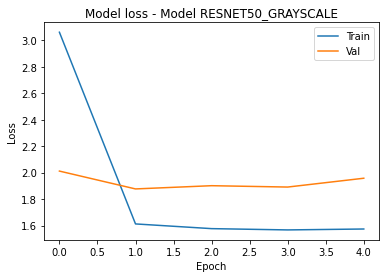

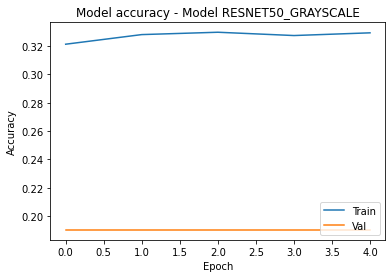

Normalized confusion matrix


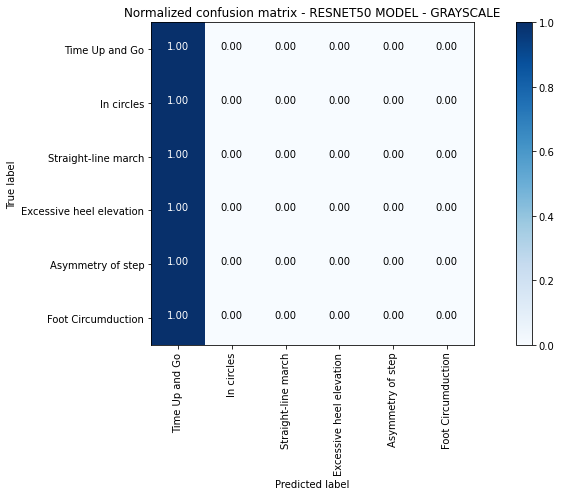

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: De

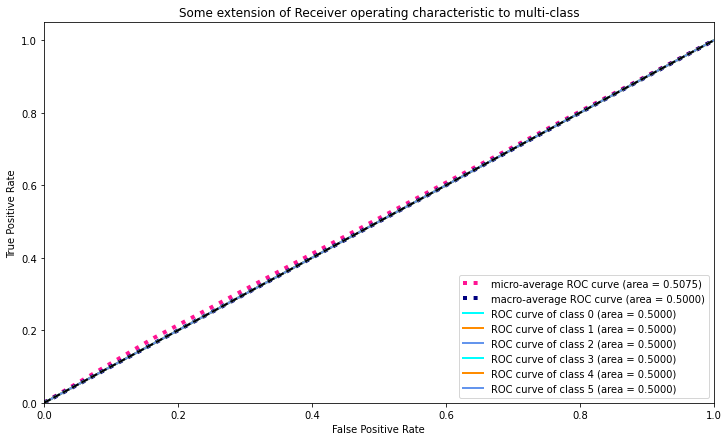

{0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 'micro': 0.5075098057973787, 'macro': 0.5}


In [103]:
import pandas as pd
from sklearn.metrics import classification_report

plota_historico(hist, model='RESNET50_{}'.format(tipo_dos_dados))

y_Pred=y_prediction(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix

#CATEGORIAS=["Time Up and Go","Em circulos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

plt.figure(figsize=(12, 7))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix - RESNET50 MODEL - {}'.format(tipo_dos_dados))
plt.savefig("Normalized Confusion Matrix - RESNET50 MODEL - {}.png".format(tipo_dos_dados))
plt.show()


clsf_report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = y_Pred, output_dict=True)).transpose()
clsf_report.to_csv('./classification_report_RESNET50_{}.csv'.format(tipo_dos_dados), index= True)

ROC_E_AUC(y_Pred,Y_test, modelo='RESNET50_{}'.format(tipo_dos_dados))

In [104]:
base_model = InceptionV3(include_top=False, weights="imagenet", input_shape=(X_train.shape[1:]))
base_model.training=True
base_model.trainable=False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 37, 37, 32)   864         input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_104 (BatchN (None, 37, 37, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 37, 37, 32)   0           batch_normalization_104[0][0]    
_______________________________________________________________________________________

In [105]:
inputs = tf.keras.Input(shape=(X_train.shape[1:]))
prediction_layer = tf.keras.layers.Dense(6, activation='softmax')
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

x = base_model(inputs)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer='l1')(x)
#x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.9)(x)
x = tf.keras.layers.Dropout(0.0)(x)
x = tf.keras.layers.Dense(500, activation='relu', kernel_regularizer='l1')(x)
x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.9)(x)
x = tf.keras.layers.Dropout(0.0)(x)
x = tf.keras.layers.Dense(100, activation='relu', kernel_regularizer='l1')(x)
x = tf.keras.layers.BatchNormalization(epsilon=0.001, momentum=0.9)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 2048)              0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 2048)              0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1000)              2049000   
_________________________________________________________________
dropout_38 (Dropout)         (None, 1000)            

In [106]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=1e-4),metrics=['accuracy'])

tempo_inicial=time.time()

hist= model.fit(X_train, Y_train, epochs=100, batch_size=16, shuffle=True, validation_data=(X_val, Y_val),callbacks=[es])

print(time.time()-tempo_inicial)

Train on 31356 samples, validate on 10453 samples
Epoch 1/100
31356/31356 [==============================] - 64s 2ms/sample - loss: 175.0185 - acc: 0.2572 - val_loss: 18.2288 - val_acc: 0.2380
Epoch 2/100
31356/31356 [==============================] - 61s 2ms/sample - loss: 7.5129 - acc: 0.3036 - val_loss: 2.7471 - val_acc: 0.3069
Epoch 3/100
31356/31356 [==============================] - 61s 2ms/sample - loss: 2.1535 - acc: 0.3267 - val_loss: 1.9786 - val_acc: 0.3212
Epoch 4/100
31356/31356 [==============================] - 62s 2ms/sample - loss: 1.9515 - acc: 0.3300 - val_loss: 1.9668 - val_acc: 0.3111
Epoch 5/100
31356/31356 [==============================] - 61s 2ms/sample - loss: 1.9431 - acc: 0.3337 - val_loss: 1.9114 - val_acc: 0.3341
Epoch 6/100
31356/31356 [==============================] - 61s 2ms/sample - loss: 1.9403 - acc: 0.3391 - val_loss: 1.9307 - val_acc: 0.3351
Epoch 7/100
31356/31356 [==============================] - 62s 2ms/sample - loss: 1.9409 - acc: 0.3369 - va

In [107]:

model.save("./Modelo_INCEPTIONV3_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_{}".format(tipo_dos_dados))



In [108]:
load_model = tf.keras.models.load_model("./Modelo_INCEPTIONV3_6_movimentos_IMAGENS_SOMADAS_4_CICLOS_{}".format(tipo_dos_dados))

Normalized confusion matrix


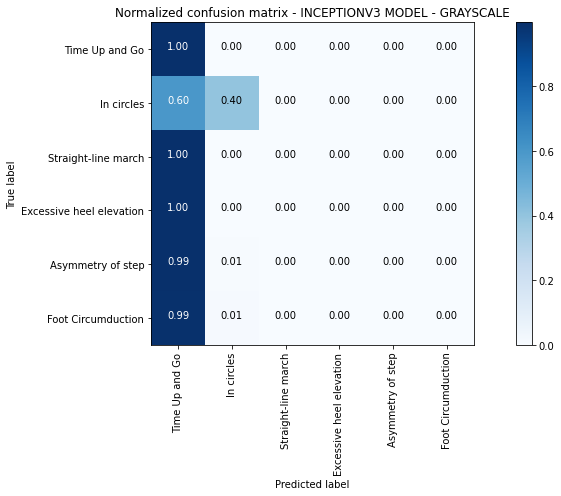

In [109]:
import pandas as pd
from sklearn.metrics import classification_report

#plota_historico(hist)

y_Pred=y_prediction(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_Pred)
np.set_printoptions(precision=3)

# Plot normalized confusion matrix

#CATEGORIAS=["Time Up and Go","Em circulos", "Marcha em linha reta", "Elevação excessiva do calcanhar"," Assimetria de passo", "Circundação do pé"]

plt.figure(figsize=(12, 7))
plot_confusion_matrix(cnf_matrix, classes=CATEGORIAS, normalize=True,
                      title='Normalized confusion matrix - INCEPTIONV3 MODEL - {}'.format(tipo_dos_dados))
plt.savefig("Normalized Confusion Matrix - INCEPTIONV3 MODEL - {}.png".format(tipo_dos_dados))
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: De

              precision    recall  f1-score      support
0              0.193776  0.997330  0.324503   1873.00000
1              0.960640  0.400102  0.564919   1952.00000
2              0.000000  0.000000  0.000000   1901.00000
3              0.000000  0.000000  0.000000   1904.00000
4              0.000000  0.000000  0.000000   1842.00000
5              0.000000  0.000000  0.000000    981.00000
accuracy       0.253420  0.253420  0.253420      0.25342
macro avg      0.192403  0.232905  0.148237  10453.00000
weighted avg   0.214112  0.253420  0.163639  10453.00000


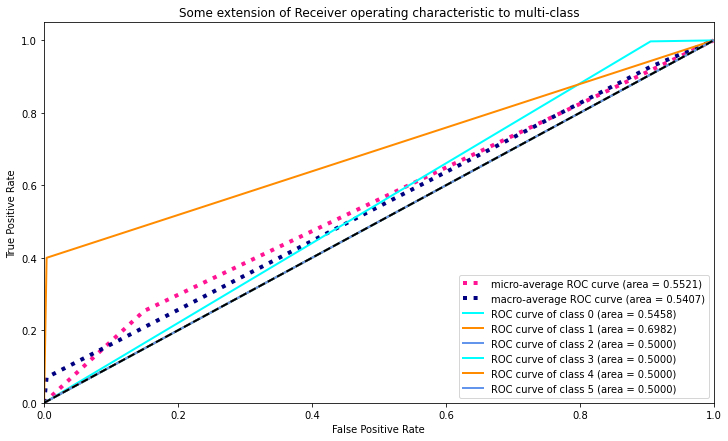

{0: 0.5457514900120346, 1: 0.6981690979942573, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 'micro': 0.5520520424758443, 'macro': 0.5406534313343819}


In [110]:

clsf_report = pd.DataFrame(classification_report(y_true = Y_test, y_pred = y_Pred, output_dict=True)).transpose()
print(clsf_report)
clsf_report.to_csv('./classification_report_INCEPTIONV3_{}.csv'.format(tipo_dos_dados), index= True)
ROC_E_AUC(y_Pred,Y_test, modelo='INCEPTIONV3 - {}'.format(tipo_dos_dados))